In [2]:
import numpy as np
import matplotlib.pyplot as plt
from adaptation_lib.spike_stats import *

output_events=np.load('output_events_PC_Flat.npy')
test_config={
    'nvn':10,
    'pvn':0,
    'pcn':200,
    'sstn':0,
}
pcn_spike_array=spike_time_array(output_events, test_config, 'pcn')
#|||||||
output_events=np.asanyarray(output_events)
spike_times_all=output_events[1]-output_events[1][0]
spike_id=output_events[0]
pc_ff_list=[]
pc_time_list=[]

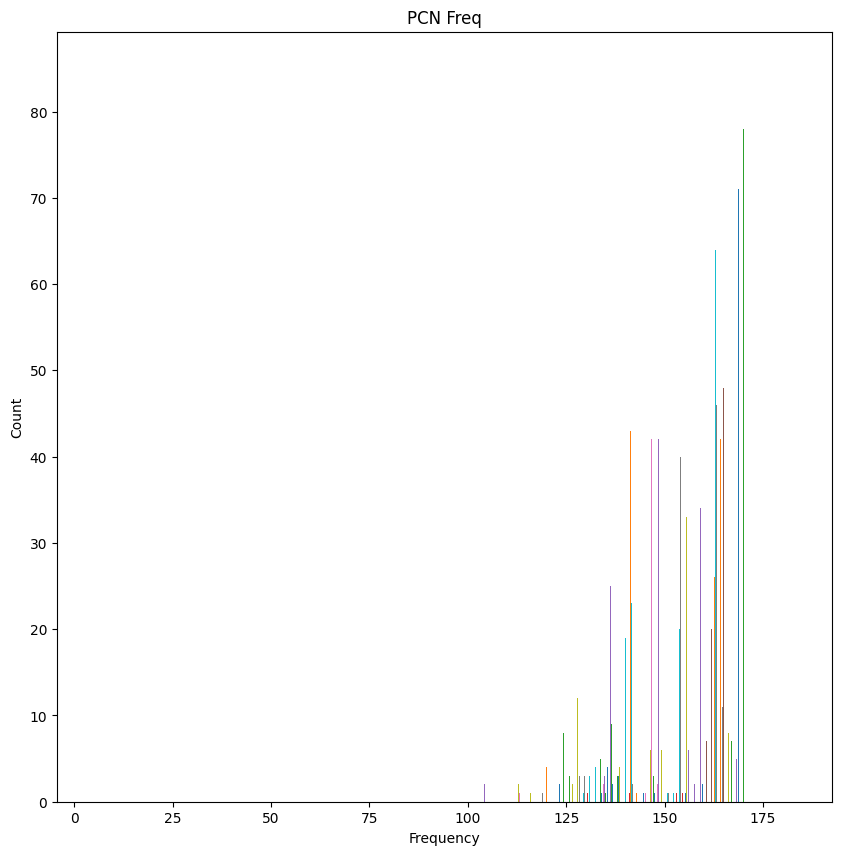

In [18]:
#remove scientific notation
np.set_printoptions(suppress=True)
isi_pcn=[np.diff(i)for i in pcn_spike_array]
#remove all zeroes or nan
isi_pcn=[i[i!=0] for i in isi_pcn]
isi_pcn=[i[~np.isnan(i)] for i in isi_pcn]
#convert to frequency
freq_pcn=[1/i for i in isi_pcn]
#plot
plt.figure(figsize=(10,10))
plt.hist(freq_pcn, bins=100)
plt.title('PCN Freq')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

In [25]:
def frequency_arrays(output_events, test_config):
    output_events=np.asanyarray(output_events)
    spike_times_all=output_events[1]-output_events[1][0]
    spike_id=output_events[0]
    pc_ff_list=[]
    pc_time_list=[]
    pvn_ff_list=[]
    pvn_time_list=[]
    sstn_ff_list=[]
    sstn_time_list=[]
    nvn=test_config['nvn']
    pcn=test_config['pcn']
    pvn=test_config['pvn']
    sstn=test_config['sstn']
    if pcn>0:
        for i in range(nvn+1,pcn+1+nvn):  
                    occurences=spike_times_all[spike_id==i]
                    ocurrence_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            pc_ff_list.append(1/isi)
                            pc_time_list.append(ocurrence_times)
    if pvn>0:
        for i in range(nvn+pcn+1,nvn+pcn+pvn+1):
                    occurences=spike_times_all[spike_id==i]
                    ocurrence_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            pvn_ff_list.append(1/isi)
                            pvn_time_list.append(ocurrence_times)
    if sstn>0:
        for i in range(nvn+pcn+pvn+1,nvn+pcn+pvn+sstn+1):
                    occurences=spike_times_all[spike_id==i]
                    ocurrence_times=spike_times_all[spike_id==i]
                    if len(occurences)>0:
                        isi=np.diff(occurences)
                        if(isi==0).any():
                            print("removed")
                        else:
                            #numpy append to isi to ff list
                            sstn_ff_list.append(1/isi)
                            sstn_time_list.append(ocurrence_times)
    return pc_ff_list, pc_time_list, pvn_ff_list, pvn_time_list, sstn_ff_list, sstn_time_list


In [41]:
def plot_freq_all(output_events, test_config, neuron_type):
    freqency_arrays=frequency_arrays(output_events, test_config)
    pc_ff_list=freqency_arrays[0]
    pc_time_list=freqency_arrays[1]
    pvn_ff_list=freqency_arrays[2]
    pvn_time_list=freqency_arrays[3]
    sstn_ff_list=freqency_arrays[4]
    sstn_time_list=freqency_arrays[5]
    #see types of both lists
    if neuron_type=='pcn':
        plt.figure(figsize=(10,10))
        ave=weighted_moving_average(pc_ff_list[0],pc_time_list[0][:-1],5)
        print(len(ave))
        plt.plot(pc_time_list[0][:-1],ave)
        for i in range(20):
            ave=weighted_moving_average(pc_ff_list[i],pc_time_list[i][:-1],10)
            plt.plot(pc_time_list[i][:-1],ave)
    if neuron_type=='pvn':
        plt.figure(figsize=(10,10))
        ave=weighted_moving_average(pvn_ff_list[0],pvn_time_list[0][:-1],5)
        print(len(ave))
        plt.plot(pvn_time_list[0][:-1],ave)
        for i in range(len(pvn_ff_list)):
            ave=weighted_moving_average(pvn_ff_list[i],pvn_time_list[i][:-1],10)
            plt.plot(pvn_time_list[i][:-1],ave)
    if neuron_type=='sstn':
        plt.figure(figsize=(10,10))
        ave=weighted_moving_average(sstn_ff_list[0],sstn_time_list[0][:-1],5)
        print(len(ave))
        plt.plot(sstn_time_list[0][:-1],ave)
        for i in range(len(sstn_ff_list)):
            ave=weighted_moving_average(sstn_ff_list[i],sstn_time_list[i][:-1],10)
            plt.plot(sstn_time_list[i][:-1],ave)
    #x axis
    plt.xlim(0,1)
    #y axis
    plt.ylim(120,170)
    #labels
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Frequency (Hz)')
    plt.grid(True)
    plt.show()

149


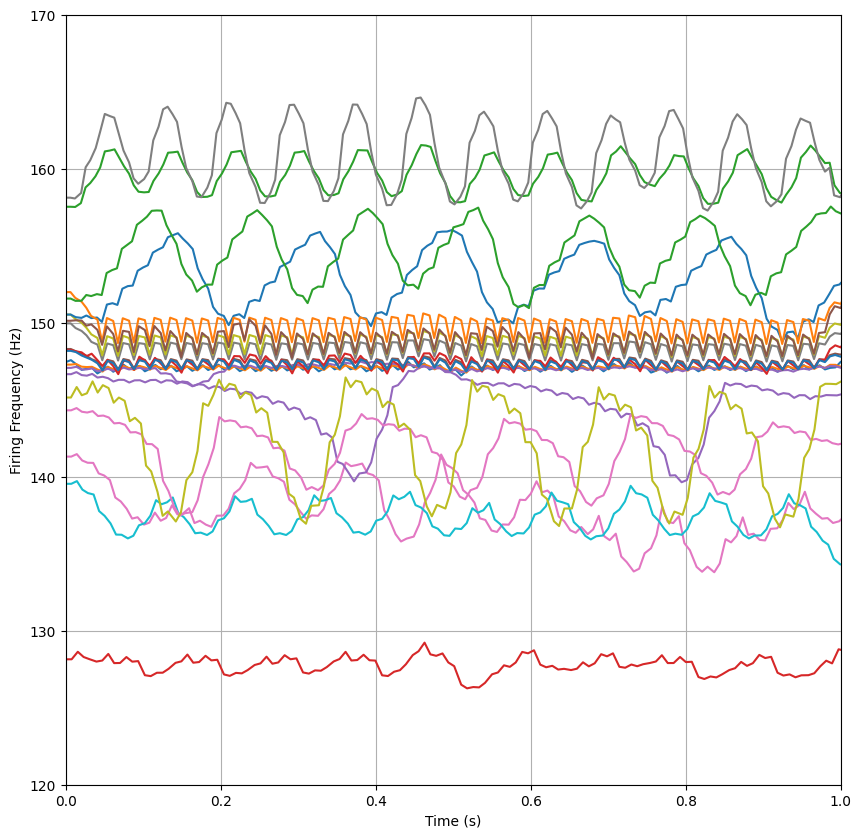

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from adaptation_lib.spike_stats import *

test_config={
    'nvn':10,
    'pvn':0,
    'pcn':200,
    'sstn':0,
}

output_events=np.load('output_events_PC_Flat.npy')
plot_freq_all(output_events, test_config, 'pcn')